# Support Vector Machines (Linearly Separable Data)

`Support Vector Machines`  
`synthetic data`

---

In this notebook, we experiment with support vector machines with linear kernel to find the best hyperplane that separates the linearly separable data. We address two cases, 2D and 3D data.

## Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt

## 2D Data

### Data

In [3]:
data = pd.read_csv("data/elemek.txt", sep="\t", header=None)
print(data.shape)
data.head()

(400, 3)


,0,1,2
0,5.495510,4.239091,1
1,3.462259,5.436985,1
2,5.165979,4.352896,1
3,-2.159392,14.900500,1
4,1.635269,8.116939,1


- Let's plot the data:

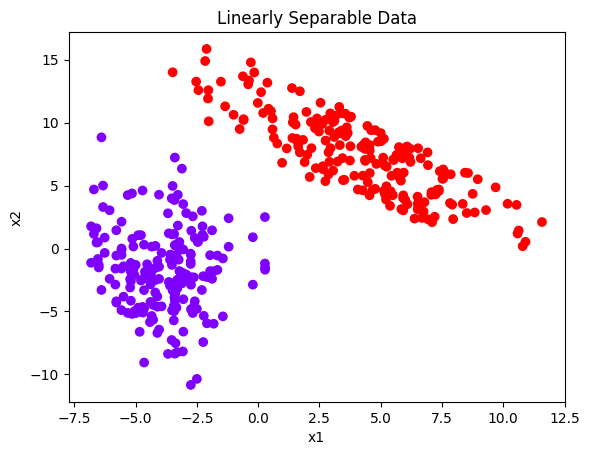

In [5]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,2], cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Linearly Separable Data")
plt.show()

- It is clear that the data is linearly separable.

### Linear SVM

- Let's fit a support vector machine model with a linear kernel to the data:

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

clf = SVC(kernel="linear")
clf.fit(X, y)
clf.support_vectors_

array([[-3.396495,  7.229055],
       [ 0.980157,  6.813771],
       [-2.014983, 10.11059 ]])

### Plot the decision boundary

In [7]:
def get_x2_coord(x1, c0, c1, c2):
  return -(c0+c1*x1)/c2

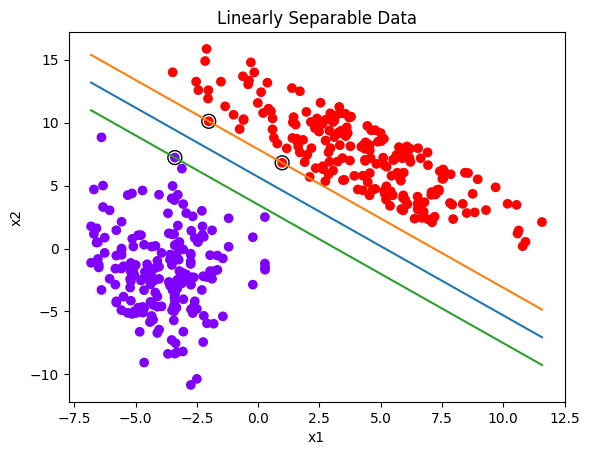

In [11]:
# plot the supporting vectors
sv = clf.support_vectors_
plt.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors="black")
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,2], cmap="rainbow")

# plot the decision boundary
c0, c1, c2 = clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]

x1_min, x1_max = data.iloc[:,0].min(), data.iloc[:,0].max()
x1_range = np.linspace(x1_min, x1_max, 100)
plt.plot(x1_range, get_x2_coord(x1_range, c0, c1, c2))

# calculate the margin to plot the lines that passes through the supporting vectors
d1 = 1 / np.linalg.norm(clf.coef_);
d2 = d1 / np.sin(np.pi / 2 + np.arctan(-clf.coef_[0][0] / clf.coef_[0][1])) # the margin

plt.plot(x1_range, get_x2_coord(x1_range, c0, c1, c2)+d2)
plt.plot(x1_range, get_x2_coord(x1_range, c0, c1, c2)-d2)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Linearly Separable Data")
plt.show()

## 3D Data

### Data

- Let's generate some 3D data:

In [12]:
X1 = np.c_[np.random.uniform(0, 1, 50)-0.8,
           np.random.uniform(0, 1, 50)-1.,
           np.random.uniform(0, 1, 50)-1.2]

X2 = np.c_[np.random.uniform(0, 1, 50),
           np.random.uniform(0, 1, 50),
           np.random.uniform(0, 1, 50)]

X = np.concatenate((X1, X2)) + 2
y = np.concatenate([np.zeros(50), np.ones(50)])
X.shape, y.shape

((100, 3), (100,))

- Let's plot the data:

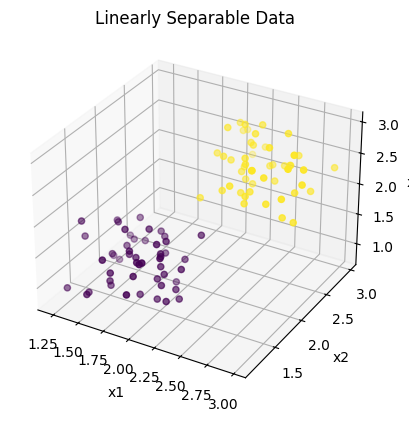

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.set_title("Linearly Separable Data")
plt.show()

- The data is linearly separable again.

### Linear SVM

- Let's fit a support vector machine model with linear kernel to the data:

In [14]:
clf = SVC(kernel="linear")
clf.fit(X, y)
clf.support_vectors_

array([[1.94974406, 1.54312528, 1.67832388],
       [2.16964679, 1.93573413, 1.62219346],
       [1.7842449 , 1.70609916, 1.71682199],
       [1.96580389, 1.67895136, 1.62682535],
       [2.07835204, 2.08348087, 2.07377034],
       [2.37335117, 2.27012751, 2.15088002],
       [2.26312644, 2.13774925, 2.234946  ],
       [2.50707265, 2.07519199, 2.18666892]])

### Plot the decision boundary

In [15]:
def get_x3_coord(x1, x2, c0, c1, c2, c3):
  return -(c0+c1*x1+c2*x2)/c3

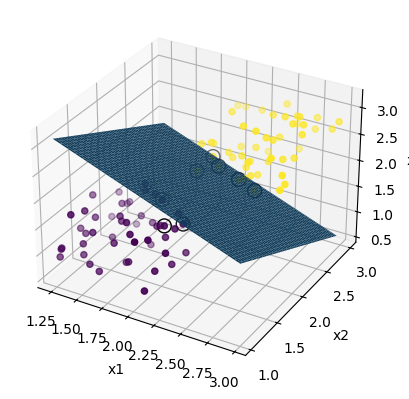

In [ ]:
# plot the supporting vectors
sv = clf.support_vectors_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.scatter(sv[:,0], sv[:,1], sv[:,2], s=100, facecolors='none', edgecolors="black")

# plot the decision boundary
c0, c1, c2, c3 = clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1], clf.coef_[0][2]

x1_min, x1_max = np.min(X[:,0]), np.max(X[:,0])
x2_min, x2_max = np.min(X[:,1]), np.max(X[:,1])
x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
meshgrid = np.meshgrid(x1_range, x2_range)
x1_grid, x2_grid = meshgrid[0], meshgrid[1]
ax.plot_surface(x1_grid, x2_grid, get_x3_coord(x1_grid,x2_grid, c0, c1, c2, c3))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
plt.show()